<a href="https://colab.research.google.com/github/harry84523/maingit/blob/master/fb%E7%88%AC%E8%9F%B2_%2B_shose_RGB_%E9%A1%8F%E8%89%B2%E5%88%86%E6%9E%90_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import os
import pandas as pd
import time
from PIL import Image

## 1.爬取fb社團照片


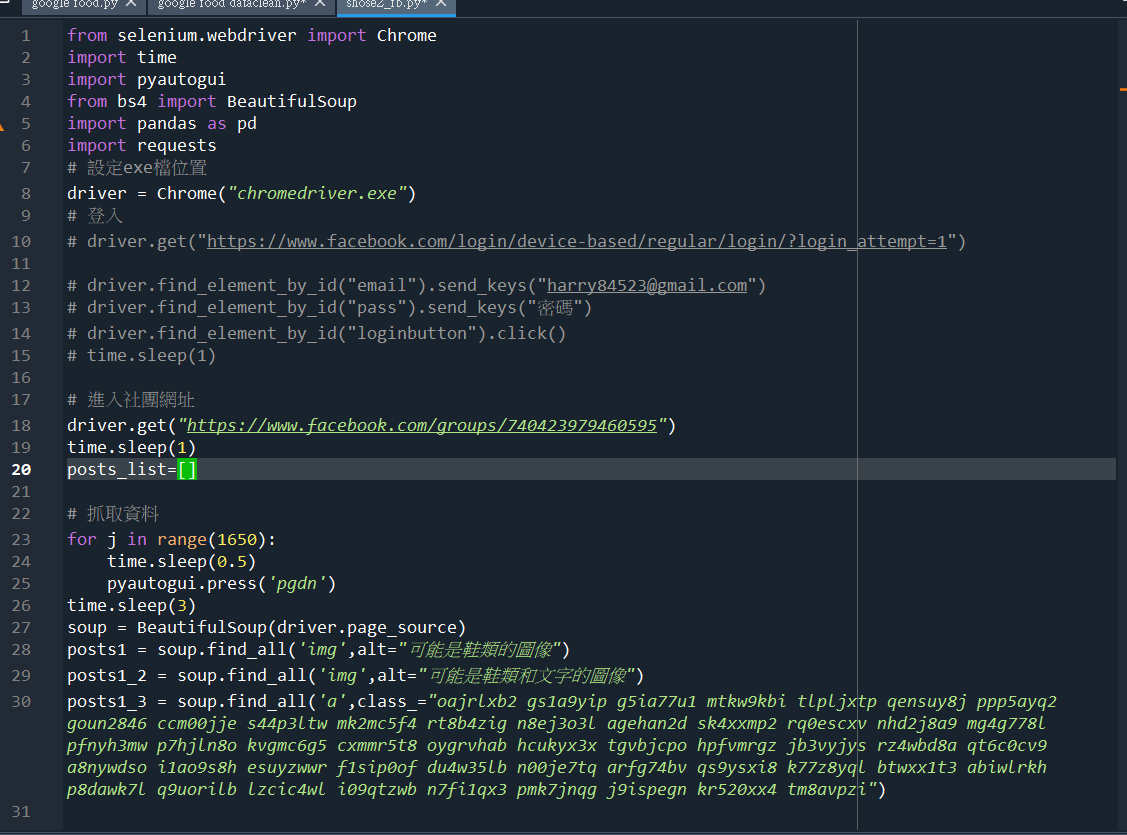

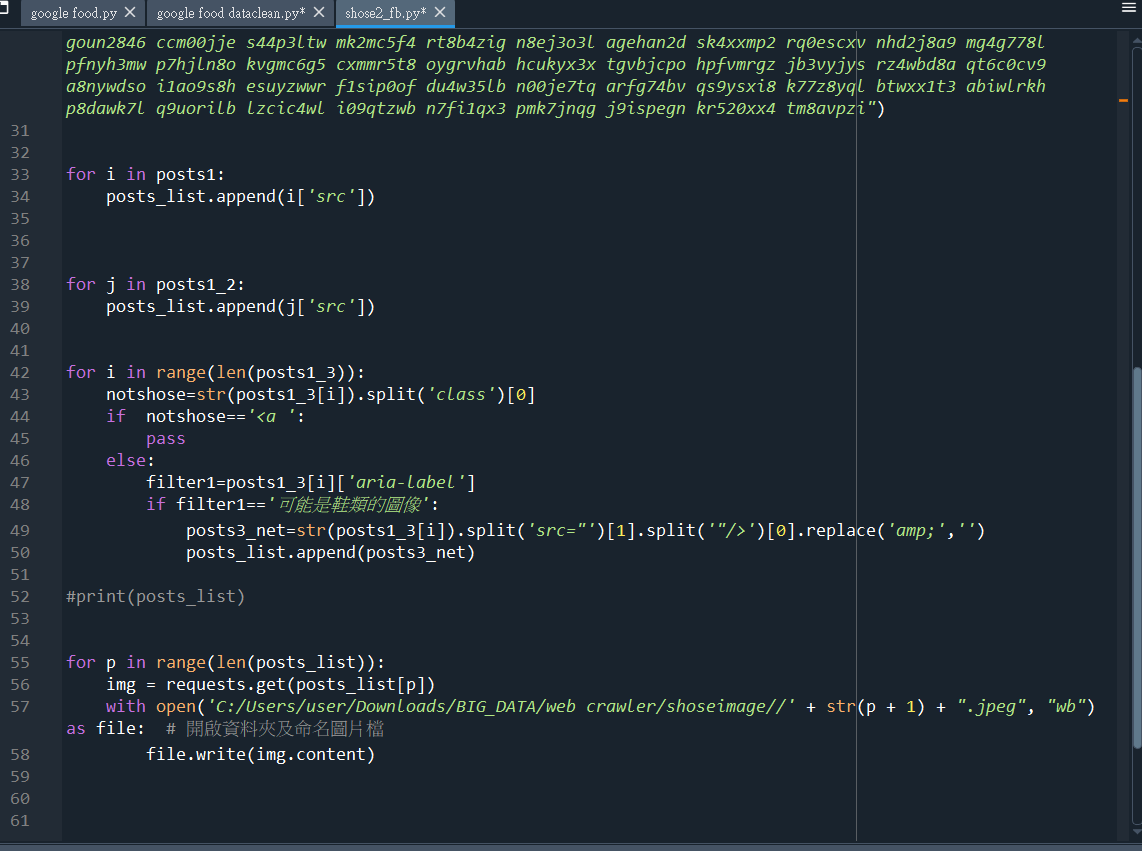

###爬取完的照片

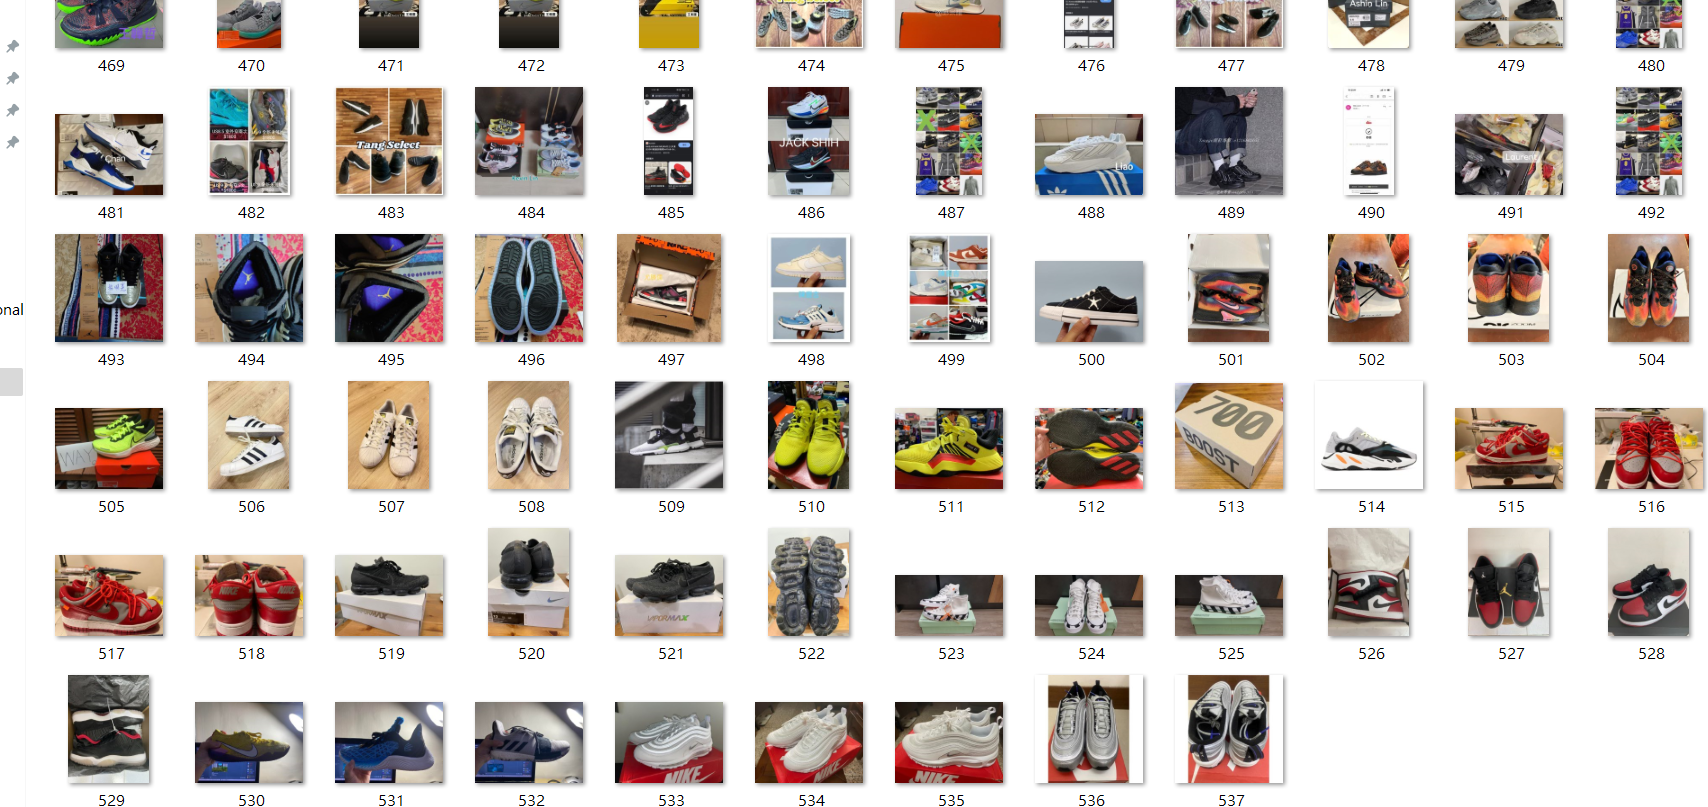

###載入照片確定檔案可以讀入

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/spyder/shose image'
fileist=os.listdir(path)
print(len(fileist))

537


## 2.kmeans分析照片主要顏色存成圖檔

--------

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/spyder/shose image'
fileist=os.listdir(path)
color_list = []
all_color_number = []
r_list = []
g_list = []
b_list = []
for i in fileist:
    img = cv.imread("/content/drive/MyDrive/Colab Notebooks/spyder/shose image/"+i)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)#轉換成hsv顏色
    clt_1 = KMeans(n_clusters=3)
    clt_1.fit(img.reshape(-1, 3))#kmeans套用img
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    n_pixels = len(clt_1.labels_)#最裡面的list各為一個cluster
    counter = Counter(clt_1.labels_) # count how many pixels per cluster(每個cluster有幾個)
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2) # 不同cluster數量除已全部cluster數量，再用np.round取至小數點第二位，放入perc的字典裡
    perc = dict(sorted(perc.items()))#把上面形成的數值轉乘item排序再設為dict存回變數perc
    for w in clt_1.cluster_centers_:
        all_color_number.append(w)# 將 clt_1.cluster_centers_個別存進 all_color_number 的list裡
    color_list1 = clt_1.cluster_centers_.tolist()#將 clt_1.cluster_centers_轉乘list形式
    color_list.append(color_list1)# 將color_list1 append進去 color_list
df = pd.DataFrame()
#df['count'] = count_list
df['color'] = color_list # 這裡的color包含一張圖的三個主要顏色 第一筆[[219.79508654382755, 145.48427321794418, 113.93820956635403], [55.6845393780806, 25.318802673645536, 21.94202266783217], [173.05533394701934, 85.87439909992891, 55.02802495653139]]
df.to_csv('/content/drive/MyDrive/Colab Notebooks/spyder/ShosePhoto_to_colo.csv',index=False, encoding='utf-8-sig')
try:
  os.mkdir('/content/drive/MyDrive/Colab Notebooks/spyder/shose_hsv_color')#先創建一個資料夾等等裝顏色圖檔
except:
  pass
for j in all_color_number:  # 將 all_color_number 中的 clt_1.cluster_centers_帶入   (這裡的all_color_number每一個值為單一顏色)
    r_list.append(int(j[0])) #取 clt_1.cluster_centers_[0]放入r_list
    g_list.append(int(j[1])) #取 clt_1.cluster_centers_[1]放入g_list
    b_list.append(int(j[2])) #取 clt_1.cluster_centers_[2]放入b_list    把每張照片中3個主要顏色(center)在個別取出放入list中
for k in range(len(all_color_number)):  # 長度為  3(分為3群主色)*27(有27張圖片)，每次取一個顏色出來
    im = Image.new("RGB",(64,48) ,(r_list[k], g_list[k],b_list[k]))#將 r g b 值帶入存成顏色圖片
    im.save('/content/drive/MyDrive/Colab Notebooks/spyder/shose_hsv_color/'+str(k)+'.jpg')

##3.解安裝opencv及imgaug內建套件

---


In [ ]:
!pip uninstall opencv-python

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
!pip uninstall imgaug

Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/imgaug-0.2.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/imgaug/*
Proceed (y/n)? y
  Successfully uninstalled imgaug-0.2.9


##4.安裝需要套件版本

-------

In [ ]:
!pip install imgaug==0.2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 562 kB 13.3 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-py3-none-any.whl size=561438 sha256=354755f7ce5c3d8062fc0d76e45ede062ea10de233441392eba274eb760fdf73
  Stored in directory: /root/.cache/pip/wheels/60/dd/38/d1dc2cad2b6a66dc0249261004990bccb0f27985c74ba26e49
Successfully built imgaug
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires opencv-python, which is not installed.


In [ ]:
!pip install opencv-python==3.4.3.18

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##5.定義rgb顏色區域

-------

In [ ]:
import collections
import cv2
import numpy as np
import os
import time
import pandas as pd

In [ ]:
def getColorList():
    dict = collections.defaultdict(list)

    # 黑色
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 46])
    color_list = []
    color_list.append(lower_black)
    color_list.append(upper_black)
    dict['黑色'] = color_list

    # 灰色
    lower_gray = np.array([0, 0, 46])
    upper_gray = np.array([180, 43, 220])
    color_list = []
    color_list.append(lower_gray)
    color_list.append(upper_gray)
    dict['灰色']=color_list

    # 白色
    lower_white = np.array([0, 0, 221])
    upper_white = np.array([180, 30, 255])
    color_list = []
    color_list.append(lower_white)
    color_list.append(upper_white)
    dict['白色'] = color_list

    #紅色
    # lower_red = np.array([156, 43, 46])
    # upper_red = np.array([180, 255, 255])
    # color_list = []
    # color_list.append(lower_red)
    # color_list.append(upper_red)
    # dict['紅色']=color_list

    # 紅色2
    lower_red = np.array([0, 43, 46])
    upper_red = np.array([10, 255, 255])
    color_list = []
    color_list.append(lower_red)
    color_list.append(upper_red)
    dict['紅色'] = color_list

    #橙色
    lower_orange = np.array([11, 43, 46])
    upper_orange = np.array([25, 255, 255])
    color_list = []
    color_list.append(lower_orange)
    color_list.append(upper_orange)
    dict['橙色'] = color_list

    #黃色
    lower_yellow = np.array([26, 43, 46])
    upper_yellow = np.array([34, 255, 255])
    color_list = []
    color_list.append(lower_yellow)
    color_list.append(upper_yellow)
    dict['黃色'] = color_list

    #綠色
    lower_green = np.array([35, 43, 46])
    upper_green = np.array([77, 255, 255])
    color_list = []
    color_list.append(lower_green)
    color_list.append(upper_green)
    dict['綠色'] = color_list

    #青色
    lower_cyan = np.array([78, 43, 46])
    upper_cyan = np.array([99, 255, 255])
    color_list = []
    color_list.append(lower_cyan)
    color_list.append(upper_cyan)
    dict['青色'] = color_list

    #藍色
    lower_blue = np.array([100, 43, 46])
    upper_blue = np.array([124, 255, 255])
    color_list = []
    color_list.append(lower_blue)
    color_list.append(upper_blue)
    dict['藍色'] = color_list

    # 紫色
    lower_purple = np.array([125, 43, 46])
    upper_purple = np.array([155, 255, 255])
    color_list = []
    color_list.append(lower_purple)
    color_list.append(upper_purple)
    dict['紫色'] = color_list

    return dict

##6.將 shose_hsv_color 顏色歸類進定義範圍

-------

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/spyder/shose_hsv_color/'
fileist=os.listdir(path)
color_list = []
color_list1 =[]
for i in fileist:
    filename=path+i
    frame = cv2.imread(filename)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    maxsum = -100
    color = None
    color_dict = getColorList()
    for d in color_dict:
        mask = cv2.inRange(hsv,color_dict[d][0],color_dict[d][1])
        binary = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)[1]
        binary = cv2.dilate(binary,None,iterations=2)
        img, cnts, hiera = cv2.findContours(binary.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        sum = 0
        for c in cnts:
            sum+=cv2.contourArea(c)
        if sum > maxsum :
            maxsum = sum
            color = d
    color_list.append(color)
#print(color_list)

###存取成csv檔

In [ ]:
step=3
three_to_one_list = [color_list[i:i+step] for i in range(0,len(color_list),step)]
for k in three_to_one_list:
    color_list1.append(k)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spyder/ShosePhoto_to_colo.csv')
df['hsv_color']= color_list1
df.to_csv('/content/drive/MyDrive/Colab Notebooks/spyder/ShosePhoto_to_colo.csv',index=False, encoding='utf-8-sig')

## 7.做初步的顏色比例分析

In [ ]:
dict = {}
for key in color_list:
    dict[key] = dict.get(key, 0) + 1
print('鞋子顏色分布比例:')

for i in dict:
  print(i,dict[i])

鞋子顏色分布比例:
橙色 319
灰色 624
黑色 259
白色 110
紫色 21
紅色 169
青色 26
藍色 57
綠色 11
黃色 15


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager
import seaborn as sns
from matplotlib.font_manager import fontManager

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download 
plt.style.use('seaborn')
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

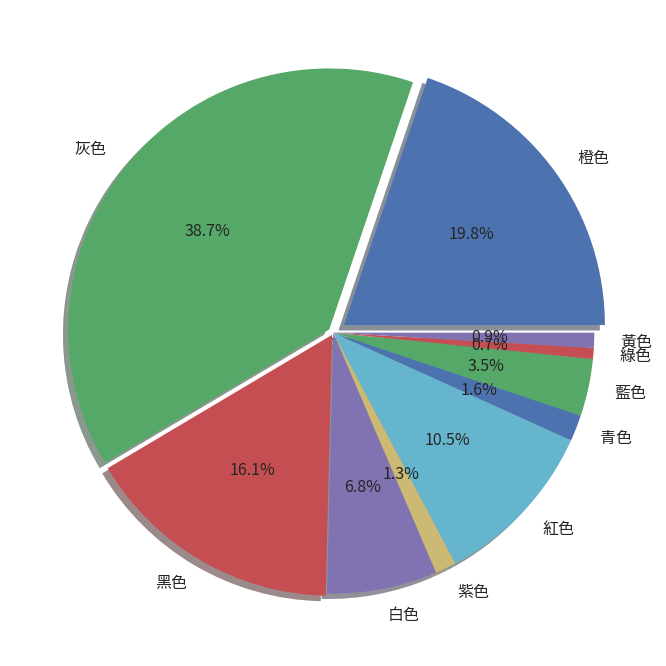

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.DataFrame()
color=[]
amount=[]
for i in dict: 
  color.append(i)
  amount.append(dict[i])
df['color']=color
df['amount']=amount
lable=df['color']
cl=df['amount']
separeted = (0.05, 0.02, 0.01, 0, 0, 0, 0, 0, 0, 0)

plt.figure(figsize=(12,12))
plt.pie(cl,labels=lable,autopct = "%1.1f%%",textprops = {"fontsize" : 16},explode = separeted ,shadow=True)
plt.show()